In [1]:
# Some important packages to import

import pandas as pd
pd.set_option('display.max_columns', None) # you can see all the columns of a dataframe table
 
import numpy as np
import math
import time
from scipy import stats
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot") # ggplot in R

import warnings
warnings.filterwarnings('ignore')

# Read Cleaned Data

In [2]:
loan_model = pd.read_csv('../data/LoanStats_model.csv')

In [3]:
loan_model.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,mths_since_last_delinq,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,settlement_amount,settlement_percentage,settlement_term,is_hardship,annual_inc_new,verification_status_new,dti_new,revol_bal_new,chargeoff_within_12_mths_new,collections_12_mths_ex_med_new,inq_last_6mths_new,mort_acc_new,num_rev_accts_new,open_acc_new,open_act_il_new,earliest_cr_line_new,il_util_2
0,10000.0,10000.0,10000.0,60 months,14.07%,233.05,C,C3,teacher,4 years,RENT,Mar-2018,Current,n,major_purchase,Major purchase,341xx,FL,0.0,32.0,0.0,34.0,w,9035.79,9035.79,1897.19,1897.19,964.21,932.98,0.0,0.0,0.0,Dec-2018,233.05,Jan-2019,Dec-2018,Individual,0.0,0.0,93913.0,0.0,0.0,0.0,54.0,93206.0,0.0,1.0,707.0,111.0,4500.0,0.0,0.0,0.0,1.0,5524.0,3793.0,15.7,0.0,161.0,88.0,18.0,18.0,18.0,18.0,14.0,1.0,1.0,2.0,4.0,30.0,2.0,1.0,17.0,0.0,0.0,0.0,43.8,0.0,0.0,0.0,84930.0,93913.0,4500.0,80430.0,N,Cash,N,0.0,0.0,0.0,True,42000.0,Source Verified,24.69,707.0,0.0,0.0,0.0,0.0,4.0,17.0,15.0,2000,115.884620
1,2600.0,2600.0,2600.0,36 months,7.96%,81.43,A,A5,minority,3 years,MORTGAGE,Mar-2018,Current,n,other,Other,481xx,MI,0.0,0.0,0.0,9.0,w,2074.45,2074.45,649.14,649.14,525.55,123.59,0.0,0.0,0.0,Dec-2018,81.43,Jan-2019,Dec-2018,Individual,0.0,0.0,241067.0,0.0,0.0,0.0,34.0,56811.0,0.0,1.0,7283.0,56.0,15800.0,0.0,0.0,0.0,1.0,30133.0,588.0,94.4,0.0,79.0,64.0,19.0,19.0,45.0,6.0,0.0,2.0,4.0,2.0,2.0,3.0,5.0,4.0,8.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,259780.0,68587.0,10500.0,62185.0,N,Cash,N,0.0,0.0,0.0,True,62000.0,Not Verified,19.61,11776.0,0.0,0.0,0.0,1.0,5.0,8.0,2.0,2010,91.358045
2,10000.0,10000.0,10000.0,36 months,6.07%,304.54,A,A2,director,10+ years,OWN,Mar-2018,Current,n,house,Home buying,117xx,NY,0.0,0.0,0.0,25.0,w,7932.01,7932.01,2429.58,2429.58,2067.99,361.59,0.0,0.0,0.0,Dec-2018,304.54,Jan-2019,Dec-2018,Individual,0.0,0.0,318464.0,0.0,0.0,3.0,16.0,10051.0,0.0,2.0,3634.0,17.0,60900.0,1.0,1.0,0.0,5.0,28951.0,42115.0,14.1,0.0,68.0,288.0,17.0,16.0,17.0,16.0,0.0,2.0,2.0,5.0,9.0,4.0,9.0,2.0,12.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,434276.0,16936.0,49000.0,37376.0,N,Cash,N,0.0,0.0,0.0,True,175000.0,Source Verified,4.94,6885.0,0.0,0.0,0.0,5.0,16.0,12.0,2.0,1990,26.891588
3,10000.0,10000.0,10000.0,36 months,7.96%,313.18,A,A5,assistant,2 years,RENT,Mar-2018,Current,n,credit_card,Credit card refinancing,606xx,IL,0.0,0.0,0.0,19.0,w,7878.77,7878.77,2596.60,2596.60,2121.23,475.37,0.0,0.0,0.0,Dec-2018,413.18,Jan-2019,Dec-2018,Individual,0.0,0.0,150009.0,0.0,0.0,0.0,46.0,138429.0,0.0,2.0,3826.0,43.0,26800.0,0.0,1.0,1.0,2.0,13637.0,2161.0,70.4,0.0,119.0,160.0,16.0,16.0,38.0,2.0,0.0,2.0,7.0,2.0,4.0,4.0,10.0,7.0,12.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,148048.0,150009.0,7300.0,121248.0,N,Cash,N,0.0,0.0,0.0,True,85000.0,Not Verified,7.67,11580.0,0.0,0.0,0.0,0.0,15.0,12.0,2.0,2000,114.170131
4,11200.0,11200.0,11200.0,60 months,30.79%,367.82,G,G1,minority,< 1 year,RENT,Ma

In [4]:
loan_model.shape

(107864, 104)

# Feature Transformation

## The target: interest rate

First, we convert int_rate into corresponding numerical value. 

In [5]:
loan_model['int_rate'] = loan_model['int_rate'].apply(lambda x: float(x[:-1]))

## Categorical with Multiple Levels

In [6]:
for f in loan_model:
    if loan_model[f].dtype == 'object':
        print (f, len(loan_model[f].value_counts()))

term 2
grade 7
sub_grade 35
emp_title 21
emp_length 12
home_ownership 4
issue_d 3
loan_status 7
pymnt_plan 2
purpose 13
title 12
zip_code 878
addr_state 50
initial_list_status 2
last_pymnt_d 13
next_pymnt_d 4
last_credit_pull_d 14
application_type 2
hardship_flag 2
disbursement_method 2
debt_settlement_flag 2
verification_status_new 3


### sub_grade

It has a strong correlation with feature "grade". To reduce multicollinearity, we remove sub_grade.

In [7]:
loan_model['grade'].value_counts()

B    32482
C    28747
A    26769
D    15377
E     3691
F      682
G      116
Name: grade, dtype: int64

In [8]:
loan_model['sub_grade'].value_counts()

B5    6974
B1    6933
B2    6759
C1    6458
A4    6198
B3    5924
B4    5892
C3    5787
C2    5761
A3    5688
C4    5669
A5    5321
C5    5072
A2    5052
A1    4510
D1    3479
D2    3329
D3    3164
D4    2796
D5    2609
E3     863
E5     838
E2     805
E4     732
E1     453
F1     397
G1     102
F3      79
F2      78
F4      65
F5      63
G4       5
G2       5
G3       3
G5       1
Name: sub_grade, dtype: int64

In [9]:
loan_model.drop(['sub_grade'], axis=1, inplace=True)

### zip_code

<img src="./zip_code_map.png">

In [10]:
loan_model['zip_code'] = loan_model['zip_code'].apply(lambda x: x[0]+x[-1])

### addr_state

In [11]:
loan_model.drop(['addr_state'], axis=1, inplace=True)

# Correlations

## Heatmap

In [12]:
# get correlation of all numerical variable
correlation = loan_model.select_dtypes(include = [np.number]).corr()
print(correlation['int_rate'].sort_values(ascending = False))

int_rate                 1.000000
total_rec_int            0.495689
all_util                 0.357212
bc_util                  0.354577
percent_bc_gt_75         0.344463
dti_new                  0.211587
inq_last_6mths_new       0.136750
inq_last_12m             0.136068
open_il_24m              0.129494
acc_open_past_24mths     0.128719
inq_fi                   0.128484
num_tl_op_past_12m       0.125399
open_il_12m              0.124403
open_acc_6m              0.105117
il_util_2                0.104975
delinq_2yrs              0.100710
earliest_cr_line_new     0.098554
open_rv_24m              0.091570
num_actv_rev_tl          0.090398
num_rev_tl_bal_gt_0      0.089304
open_rv_12m              0.085210
num_accts_ever_120_pd    0.068531
installment              0.068077
pub_rec_bankruptcies     0.058509
total_rec_late_fee       0.054283
num_tl_90g_dpd_24m       0.051774
pub_rec                  0.049774
recoveries               0.047076
total_pymnt_inv          0.046990
total_pymnt   

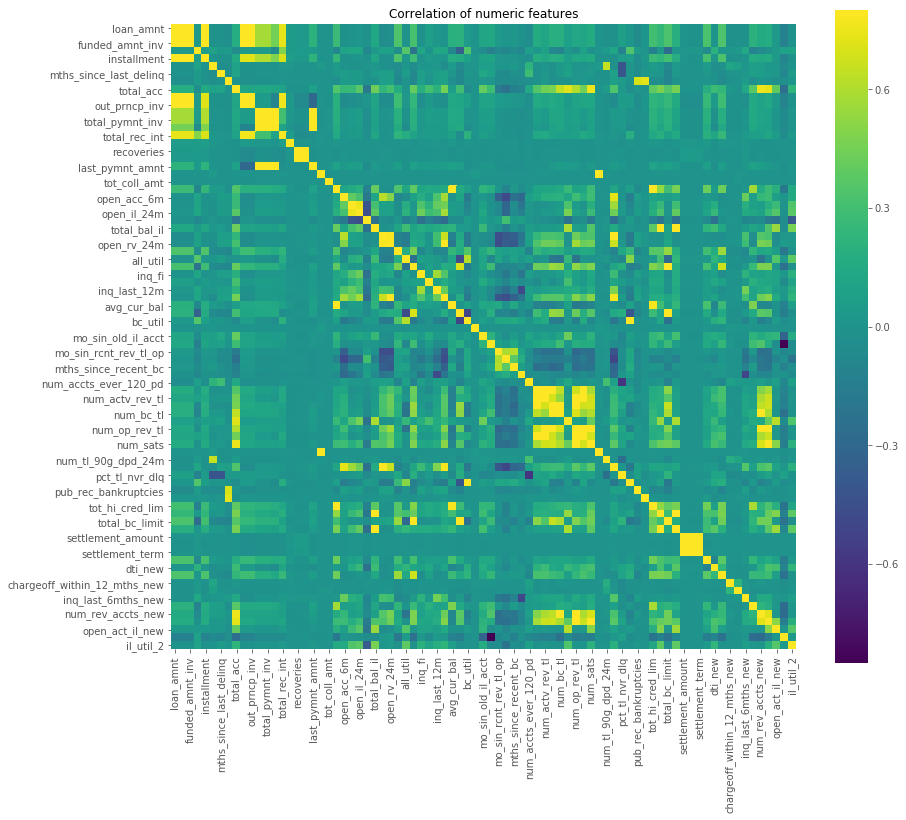

In [13]:
# heatmap in seaborn
plt.figure(figsize = (14,12))
plt.title('Correlation of numeric features',size=12)
sns.heatmap(correlation, square = True, vmax = 0.8, cmap = 'viridis')
plt.show()

## Boxplot

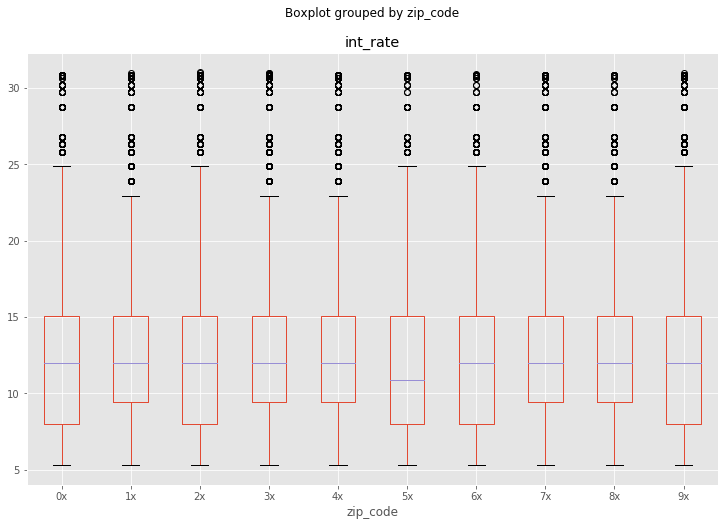

In [14]:
# boxplot of interest rate grouped by zip code
loan_model.boxplot(column='int_rate', by='zip_code', figsize=(12,8))
plt.show()

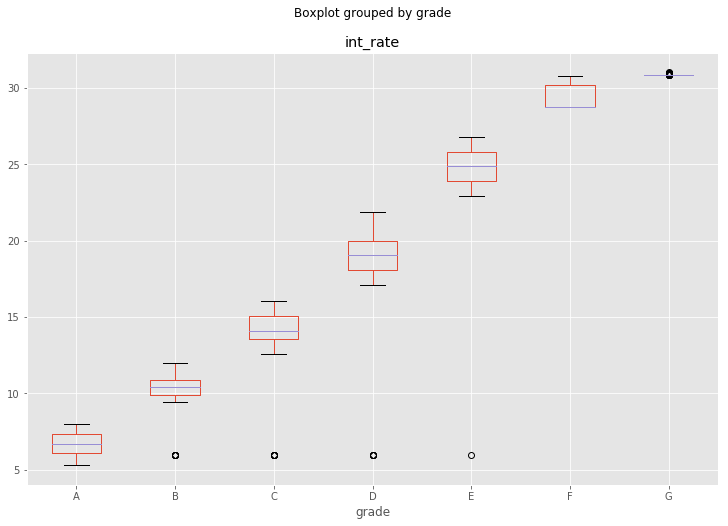

In [15]:
# grouped by grade
loan_model.boxplot(column='int_rate', by='grade', figsize=(12,8))
plt.show()

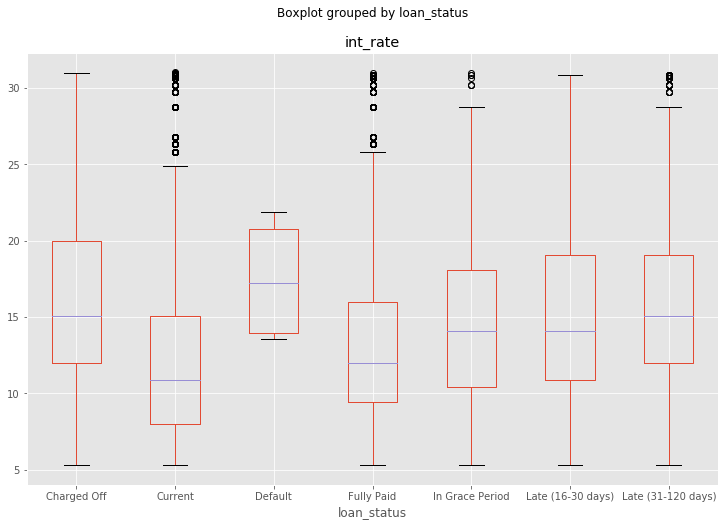

In [16]:
# grouped by loan status
loan_model.boxplot(column='int_rate', by='loan_status', figsize=(12,8))
plt.show()

We should exclude other response-related features that might have extremely high correlation with interest rate. 

In [17]:
loan_model.drop(['loan_status','grade'], axis=1, inplace=True)

# Model Training

## Get dummy

In [18]:
# extract categorical variables
dummy_columns = [x for x in loan_model if loan_model[x].dtype == 'object']

In [19]:
# before dummy
print (loan_model.shape)

# get dummies
loan_model = pd.get_dummies(loan_model, columns = dummy_columns)

# after dummy
print (loan_model.shape)

(107864, 100)
(107864, 205)


## Split train and test

In [20]:
x = loan_model[loan_model.columns.difference(['int_rate'])]
y = loan_model['int_rate'].values

# Split data into train and test (80% & 20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)

## Standarization

In [21]:
from sklearn.preprocessing import StandardScaler

# initialize a scaler object
scaler = StandardScaler()

# transform training set
x_train_std = scaler.fit_transform(x_train)

# the same transform for test set
x_test_std = scaler.transform(x_test)


In [22]:
# transform whole dataset 
X = scaler.fit_transform(x)

## Modeling

In this section, we propose four linear models: Linear Regression, Ridge Regression, Lasso Regression and Elastic Net. We use **cross validation** to tune the hyperparameter for each model (except Linear Regression, since it has no hyperparameter). That is, for each linear model, we derive an optimal set of hyperparameters. To evaluate the optimal model, we choose average RMSE score from cross validation.

In [23]:
# some necessary packages
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [24]:
# Function to evaluate the model using AIC with sum of squared error
def model_evaluation(model, x, y, cv):
    
    kf = KFold(n_splits = cv)
    AIC = 0
    rmse = 0
    mae = 0
    for train_index, validate_index in kf.split(x):
        
        # split to training and validation set
        x_train, x_validate = x[train_index], x[validate_index]
        y_train, y_validate = y[train_index], y[validate_index]
        
        # fit current model
        model.fit(x_train, y_train)
        
        # predict on validation set
        y_pred = model.predict(x_validate)
        
        # calculate sse
        sse = np.sum((y_pred - y_validate)**2)
        
        # number of observations
        n = len(x_train)
        
        # number of existing features
        k = len([x for x in model.coef_ if x != 0])
        
        # aic
        AIC += 2 * k - 2 * np.log(sse)
        
        # rmse
        rmse += np.sqrt(np.mean((y_pred - y_validate)**2))
        
        # mae 
        mae += np.mean(abs(y_pred - y_validate))
        
    # return average score among all validation sets
    return AIC / cv, rmse / cv, mae / cv

### Model Selection

In [25]:
import time

# initialize a model object
LinearReg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
RidgeReg = Ridge(alpha = 0.1)
LassoReg = Lasso(alpha = 0.001)
ElasticnetReg = ElasticNet(alpha = 0.001, l1_ratio = 0.5)

res_dict = {}
for model in [LinearReg, RidgeReg, LassoReg, ElasticnetReg]:
    print ("Training...", model)
    start = time.time()
    aic, rmse, mae = model_evaluation(model, x_train_std, y_train, 10)
    end = time.time()
    diff = end-start
    print ("Running time is %.2f seconds"%diff)
    print ("================================================================")
    res_dict[model] = [round(aic,4), round(rmse,4), round(mae,4), diff]


Training... LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Running time is 5.79 seconds
Training... Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Running time is 1.73 seconds
Training... Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Running time is 53.79 seconds
Training... ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Running time is 75.06 seconds


In [26]:
df = pd.DataFrame(res_dict).T
df.columns = ["aic", "rmse", "mae", "time"]
df

,aic,rmse,mae,time
"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,\n normalize=False)",386.4700,2.3422,1.7343,5.791808
"Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,\n normalize=False, random_state=None, solver='auto', tol=0.001)",384.4693,2.3426,1.7339,1.728356
"Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,\n normalize=False, positive=False, precompute=False, random_state=None,\n selection='cyclic', tol=0.0001, warm_start=False)",325.4531,2.3522,1.7420,53.787855
"ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,\n max_iter=1000, normalize=False, positive=False, precompute=False,\n random_state=None, selection='cyclic', tol=0.0001, warm_start=False)",345.8526,2.3524,1.7423,75.063056


### Ridge Regression

Use RidgeCV function

https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.RidgeCV.html

In [27]:
# candidate values of alpha
alphas_ridge = np.arange(1e-6, 1e-3, 5e-6)

# initialize a model object
RidgeReg = RidgeCV(alphas = alphas_ridge, store_cv_values=True)

# train model
RidgeReg.fit(x_train_std, y_train)

# get optimal alpha 
rmse_cv_ridge = np.sqrt(RidgeReg.cv_values_.mean(axis = 0))
optimal_alpha_ridge = RidgeReg.alpha_

print ("The optimal value of alpha in Ridge Regression: ", optimal_alpha_ridge)

The optimal value of alpha in Ridge Regression:  9.1e-05


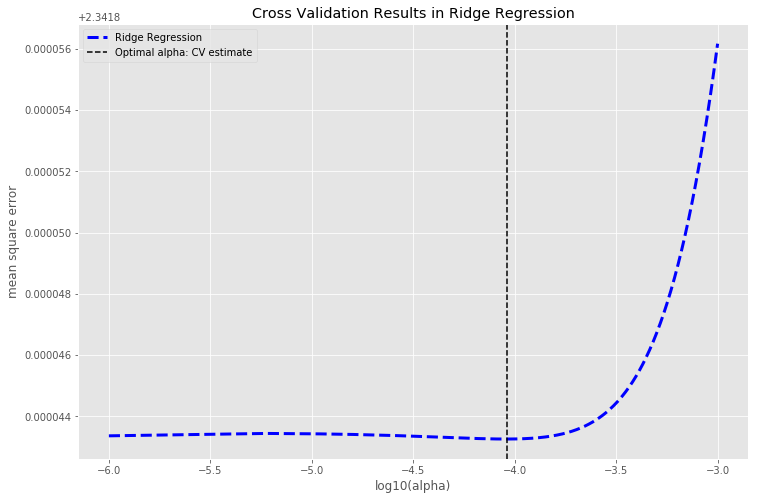

In [28]:
# plot root mean square error with the change of alpha
plt.figure(figsize=(12,8))
plt.plot(np.log10(alphas_ridge), rmse_cv_ridge, '--', color='b',
             linewidth=3, label='Ridge Regression')
plt.axvline(np.log10(optimal_alpha_ridge), linestyle='--', color='k',
        label='Optimal alpha: CV estimate')
plt.xlabel('log10(alpha)')
plt.ylabel('root mean square error')
plt.title('Cross Validation Results in Ridge Regression')
plt.legend()
plt.show()

### LASSO Regression

cross_val_score

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [29]:
# long time to run
# Hands on tunning
alphas = [0.0001, 0.0005, 0.001, 0.005]
rmse_lasso = []

for alpha in alphas:
    
    rmse = np.mean(np.sqrt(-cross_val_score(Lasso(alpha = alpha, random_state=42), 
                                              x_train_std, 
                                              y_train, 
                                              scoring = "neg_mean_squared_error", 
                                              cv = 5)))
    rmse_lasso.append(rmse)

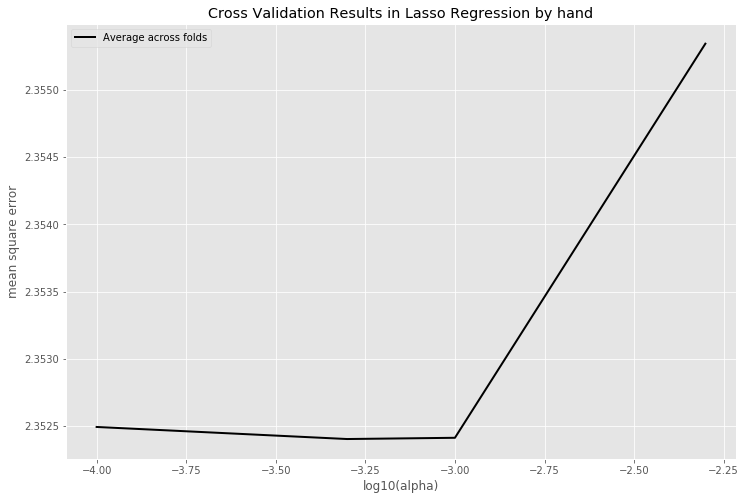

In [30]:
plt.figure(figsize=(12,8))
plt.plot(np.log10(alphas), rmse_lasso, 'k',
             linewidth=2, label='Average across folds')
# plt.axvline(np.log10(optimal_alpha_lasso), linestyle='--', color='k',
#         label='Optimal alpha: CV estimate')
plt.xlabel('log10(alpha)')
plt.ylabel('root mean square error')
plt.title('Cross Validation Results in Lasso Regression by hand')
plt.legend()
plt.show()

Also, we can use LassoCV

https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.LassoCV.html

In [31]:
# LassoCV
alphas = np.arange(1e-6,1e-3,5e-6)

# initialize a model object
LassoReg = LassoCV(alphas = alphas, random_state=42, verbose=True)

# train model
LassoReg.fit(x_train_std, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.4s finished


LassoCV(alphas=array([1.00e-06, 6.00e-06, ..., 9.91e-04, 9.96e-04]),
    copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
    verbose=True)

In [34]:
# print out optimal alpha 
rmse_cv_lasso = np.sqrt(LassoReg.mse_path_.mean(axis = -1))
alphas_lasso = LassoReg.alphas_
optimal_alpha_lasso = LassoReg.alpha_
print ("The optimal value of alpha in Lasso Regression: ", optimal_alpha_lasso)

The optimal value of alpha in Lasso Regression:  1e-06


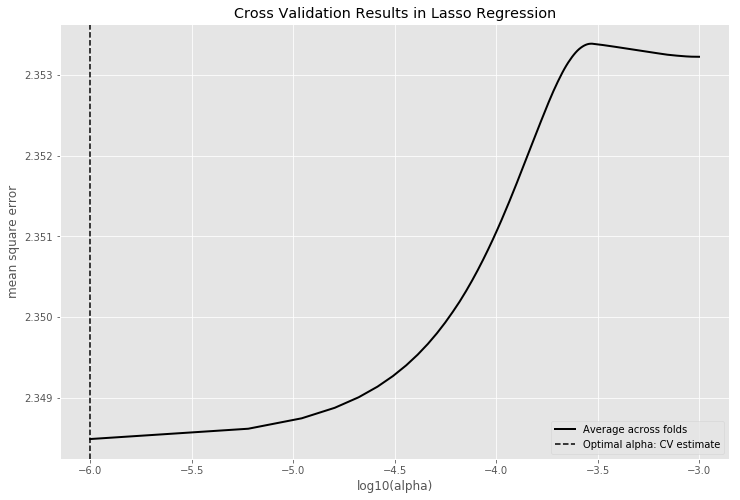

In [35]:
plt.figure(figsize=(12,8))
plt.plot(np.log10(alphas_lasso), rmse_cv_lasso, 'k',
             linewidth=2, label='Average across folds')
plt.axvline(np.log10(optimal_alpha_lasso), linestyle='--', color='k',
        label='Optimal alpha: CV estimate')
plt.xlabel('log10(alpha)')
plt.ylabel('root mean square error')
plt.title('Cross Validation Results in Lasso Regression')
plt.legend()
plt.show()

Least Angle Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html

In [36]:
# LassoLarsCV
from sklearn.linear_model import LassoLarsCV

# initialize a model object
LassoLarsReg = LassoLarsCV(cv = 10)

# train model
LassoLarsReg.fit(x_train_std, y_train)

LassoLarsCV(copy_X=True, cv=10, eps=2.220446049250313e-16, fit_intercept=True,
      max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
      positive=False, precompute='auto', verbose=False)

In [37]:
LassoLarsReg.alpha_

0.0004667054342234034

The object solves the same problem as the LassoCV object. However, unlike the LassoCV, it find the relevant alphas values by itself. In general, because of this property, it will be more stable. However, it is more fragile to heavily multicollinear datasets.

It is more efficient than the LassoCV if only a small number of features are selected compared to the total number, for instance if there are very few samples compared to the number of features.

http://statweb.stanford.edu/~tibs/ftp/lars.pdf

https://scikit-learn.org/0.15/auto_examples/linear_model/plot_lasso_model_selection.html

### Elastic Net

ElasticNetCV

https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.ElasticNetCV.html

In [38]:
alphas_elasticnet = np.arange(1e-6,1e-3,5e-6)

ElasticNetReg = ElasticNetCV(alphas = alphas_elasticnet,l1_ratio = 0.5)

# train model
ElasticNetReg.fit(x_train_std, y_train)

ElasticNetCV(alphas=array([1.00e-06, 6.00e-06, ..., 9.91e-04, 9.96e-04]),
       copy_X=True, cv='warn', eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [41]:
# print out optimal alpha 
rmse_cv_elasticnet = np.sqrt(ElasticNetReg.mse_path_.mean(axis = -1))
alphas_elasticnet = ElasticNetReg.alphas_
optimal_alpha_elasticnet = ElasticNetReg.alpha_
print ("The optimal value of alpha in Lasso Regression: ", optimal_alpha_elasticnet)

The optimal value of alpha in Lasso Regression:  1e-06


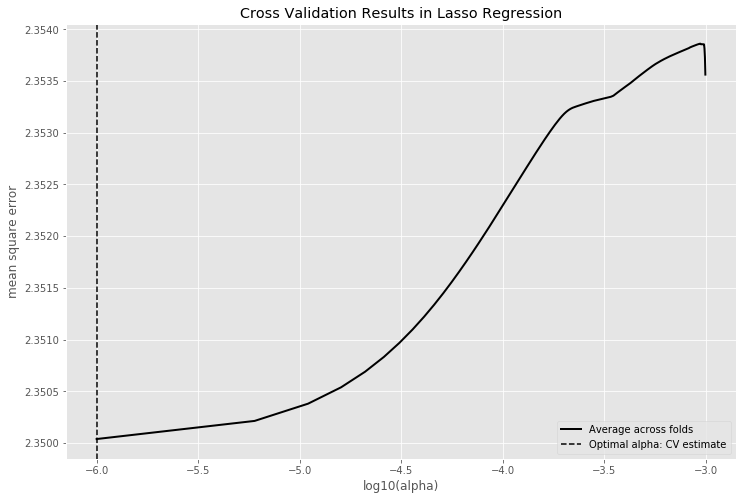

In [42]:
plt.figure(figsize=(12,8))
plt.plot(np.log10(alphas_elasticnet), rmse_cv_elasticnet, 'k',
             linewidth=2, label='Average across folds')
plt.axvline(np.log10(optimal_alpha_elasticnet), linestyle='--', color='k',
        label='Optimal alpha: CV estimate')
plt.xlabel('log10(alpha)')
plt.ylabel('root mean square error')
plt.title('Cross Validation Results in Lasso Regression')
plt.legend()
plt.show()

For example, Gradient Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [43]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

In [45]:
# initialize model
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3)

# fit model
gb.fit(x_train_std, y_train)

# predict
y_pred = gb.predict(x_train_std)

# rmse
np.sqrt(np.mean((y_pred-y_train)**2))

1.8996646476625485

## Test Set

We apply four linear models on test set, and calcualte the corresponding RMSEs. The best RMSE will be the one to train the whole dataset and make interpretation.

From the results below, we choose Ridge Regression as the final model.

In [48]:
# Ridge
y_test_pred_ridge = RidgeReg.predict(x_test_std)
rmse_test_ridge = np.sqrt(np.mean((y_test - y_test_pred_ridge)**2))
print ("MSE on test set for Ridge Regression: ", rmse_test_ridge)

# Lasso
y_test_pred_lasso = LassoReg.predict(x_test_std)
rmse_test_lasso = np.sqrt(np.mean((y_test - y_test_pred_lasso)**2))
print ("MSE on test set for Lasso Regression: ", rmse_test_lasso)

# Elastic Net
y_test_pred_elasticnet = ElasticNetReg.predict(x_test_std)
rmse_test_elasticnet = np.sqrt(np.mean((y_test - y_test_pred_elasticnet)**2))
print ("MSE on test set for Elastic Net: ", rmse_test_elasticnet)

MSE on test set for Ridge Regression:  2.324152461484785
MSE on test set for Lasso Regression:  2.335152377387072
MSE on test set for Elastic Net:  2.3351525997769884


In [49]:
# Boosting
y_test_pred_boosting = gb.predict(x_test_std)
rmse_test_boosting = np.sqrt(np.mean((y_test - y_test_pred_boosting)**2))
print ("MSE on test set for Elastic Net: ", rmse_test_boosting)

MSE on test set for Elastic Net:  1.9316992012034044


...

# Conclusion and Interpretation

Given the Ridge Regression with the best alpha 0.000226, we train the model on the whole dataset. 

In [50]:
final_model = Ridge(alpha = optimal_alpha_ridge)
y_pred = final_model.fit(X, y).predict(X)
print ("RMSE for the final model is: ", np.sqrt(np.mean((y_pred - y)**2)))

RMSE for the final model is:  2.332611402480312


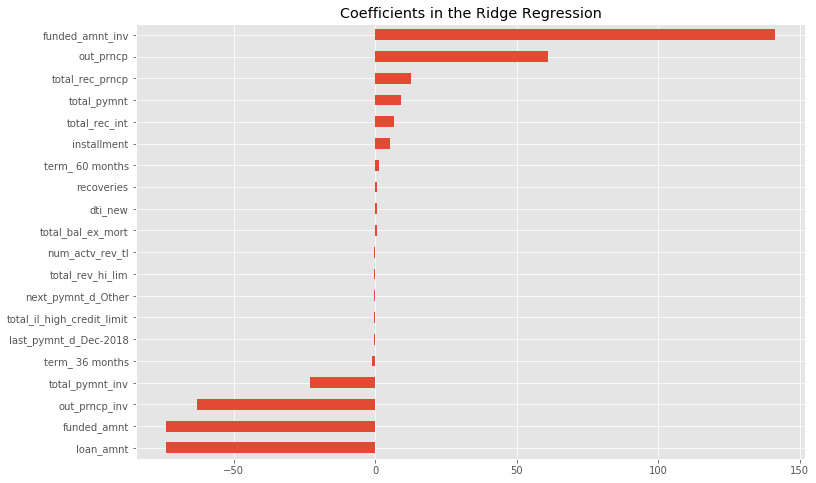

In [51]:
coef = pd.Series(final_model.coef_, index = x.columns)
importance_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.figure(figsize=(12,8))
importance_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Regression")
plt.show()

* out_prncp: Remaining outstanding principal for total amount funded

* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value

* funded_amnt: The total amount committed to that loan at that point in time